## 로지스틱 회귀

### 이진 분류

- 학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정.
- 시험 성적이 x라면, 합불 결과는 y.
- 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 생성

- 레이블에 해당하는 y가 0 또는 1이라는 두 가지 값만을 가지므로, 이 문제를 풀기 위해서 예측값은 0과 1사이의 값을 가지도록 함.
- 0과 1사이의 값을 확률로 해석하면 문제를 풀기가 훨씬 용이해짐.
- 최종 예측값이 0.5보다 작으면 0으로 예측했다고 판단하고, 0.5보다 크면 1로 예측했다고 판단.
- 만약 y = wx + b의 직선을 사용할 경우, y값이 음의 무한대부터 양의 무한대와 같은 큰 수들도 가질 수 있는데 이는 직선이 분류 문제에 적합하지 않은 두번째 이유.
- 출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수로 시그모이드 함수가 있음.

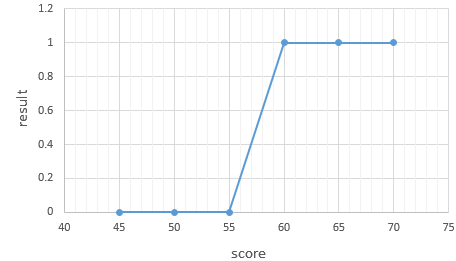

### 시그모이드 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

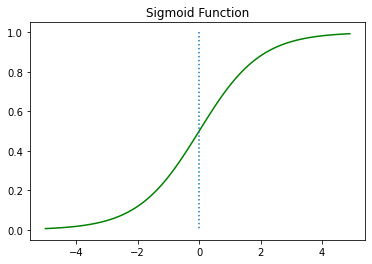

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

- 위의 그래프에서 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환.
- S자의 모양을 연상시킴
- x가 0일 때 출력값은 0.5의 값을 가짐. x가 증가하면 1에 수렴
- 가중치 w와 편향 b이 출력값에 어떤 영향을 미치는지 시각화로 확인

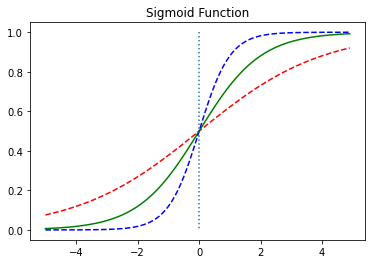

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

- 위 그래프는 w의 값이 0.5일때 빨간색 선, w의 값이 1일때는 초록색 선, w의 값이 2일때 파란색 선.
- w의 값에 따라 그래프의 경사도가 변함.
- 선형 회귀에서 직선을 표현할 때, 가중치 w는 직선의 기울기를 의미했지만 여기서는 그래프의 경사도를 결정
- w의 값이 커지면 경사가 커지고 w의 값이 작아지면 경사가 작아짐.

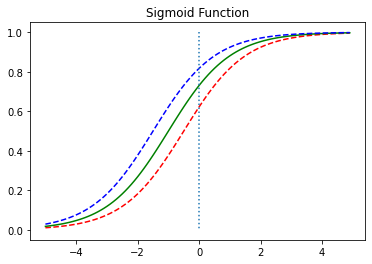

In [4]:
# b의 값에 따라서 그래프가 어떻게 변하는지 확인

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

- 위 그래프는 b값에 따라서 그래프가 이동하는 것을 보여줌. 시그모이드 함수는 입력값이 커지면 1에 수혐하고, 입력값이 작아지면 0에 수렴.
- 0부터 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5 이하이면 0(False)로 만들면 이진 분류 문제를 풀기 위해서 사용 가능.

### 비용 함수

- 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 w를 찾아내지만, 비용 함수로는 평균 제곱 오차를 사용하지 않음.
- 평균 제곱 오차를 로지스틱 회귀의 비용 함수로 사용했을 때는 좋지 않은 로컬 미니멈에 빠질 가능성이 지나치게 높아 문제 해결이 어려움.

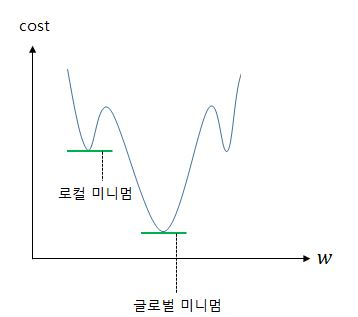

## 로지스틱 회귀 실습

- 독립 변수 데이터를 x, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y라고 취함.
- 1개의 실수 x로부터 1개의 실수인 y를 예측하는 맵핑 관계를 가지므로, Dense의 output_dim, input_dim 인자값으로 각각 1을 기재.
- 시그모이드 함수를 사용할 것이므로 activation의 인자값으로는 sigmoid를 기재.
- 옵티마이저로는 가장 기본적인 경사 하강법인 sgd를 사용.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim = 1, activation = 'sigmoid'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

model.fit(X, y, epochs = 200)

C:\Users\seho\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 0s 347ms/step - loss: 0.5798 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5782 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5766 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 0.5750 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5734 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.5718 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5701 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.5685 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5669 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 0.4553 - binary_accuracy: 0.9231
Epoch 80/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4537 - binary_accuracy: 0.9231
Epoch 81/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4521 - binary_accuracy: 0.9231
Epoch 82/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4506 - binary_accuracy: 0.9231
Epoch 83/200
1/1 [==============================] - 0s 3ms/step - loss: 0.4490 - binary_accuracy: 0.9231
Epoch 84/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4474 - binary_accuracy: 0.9231
Epoch 85/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4458 - binary_accuracy: 0.9231
Epoch 86/200
1/1 [==============================] - 0s 3ms/step - loss: 0.4443 - binary_accuracy: 0.9231
Epoch 87/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4427 - binary_accuracy: 0.9231
Epoch 88/200
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 0.3365 - binary_accuracy: 0.9231
Epoch 157/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3351 - binary_accuracy: 0.9231
Epoch 158/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3336 - binary_accuracy: 0.9231
Epoch 159/200
1/1 [==============================] - 0s 998us/step - loss: 0.3321 - binary_accuracy: 0.9231
Epoch 160/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3306 - binary_accuracy: 0.9231
Epoch 161/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3292 - binary_accuracy: 0.9231
Epoch 162/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3277 - binary_accuracy: 0.9231
Epoch 163/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3262 - binary_accuracy: 0.9231
Epoch 164/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3248 - binary_accuracy: 0.9231
Epoch 165/200
1/1 [==============================] - 0s 2m

- 200 epoch에 걸쳐 전체 데이터에 대한 오차를 최소화하는 w와 b를 찾아내는 작업을 진행.

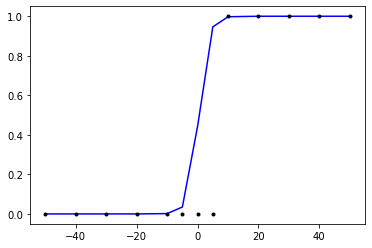

In [6]:
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

In [7]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.5968971 ]
 [0.7331978 ]
 [0.83606875]
 [0.90444505]
 [0.9280288 ]]
[[0.9986087 ]
 [0.99999714]
 [1.        ]
 [1.        ]
 [1.        ]]


- x의 값이 5보다 작을 때는 0.5보다 작은 값을, x의 값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 확인할 수 있음.